In [15]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 


df=pd.read_csv('/Users/ugur_dura/Desktop/IN2393-Machine Learning for Regulatory Genomics/Project/promoter_sequence_identification/data/parsed_data/cofactor_expression_data.csv')

In [21]:

print(len(df))

count_chr2R_with_value_1 = df[(df['seqnames'] == 'chr2R') & (df['TSS'] == 1)].shape[0]
print("Number of 'chr2R' occurrences with TSS value 1:", count_chr2R_with_value_1)

# count_chr2R_with_value_1 = df[(df['seqnames'] == 'chr2R') & (df['TSS'] == 0)].shape[0]
# print("Number of 'chr2R' occurrences with TSS value 0:", count_chr2R_with_value_1)

print(count_chr2R_with_value_1/ len(df))

71630
Number of 'chr2R' occurrences with TSS value 1: 14288
0.19946949602122016


In [4]:
df.columns

Index(['Unnamed: 0', 'TSS', 'seqnames', 'start', 'end', 'strand', 'id',
       'sequence', 'sequence_len'],
      dtype='object')

In [5]:
df['seqnames'].unique()

array(['chrY', 'chr2R', 'chr3R', 'chr2L', 'chr3L', 'chrX', 'chr4'],
      dtype=object)

In [6]:
# counts = df['set'].value_counts()
# print(counts)

In [7]:
import pandas as pd
import numpy as np

# Create a dictionary to map the seqnames to the desired set
set_mapping = {
    'chr2L': 'train',
    'chrX': 'train',
    'chr3R': 'train',
    'chr3L': 'train',
    'chrY': 'train',
    'chr4': 'train',
    'chr2R': np.nan  # placeholder value
}

# Add the 'set' column to the dataframe
df['set'] = ''

# Shuffle and assign sets for 'chr2R'
df_chr2R = df[df['seqnames'] == 'chr2R'].copy()  # subset containing only 'chr2R'
df_chr2R = df_chr2R.sample(frac=1, random_state=42)  # shuffle the subset

test_size = int(len(df_chr2R) * 0.5)  # 50% for test set
validation_size = int(len(df_chr2R) * 0.5)  # 50% for validation set

df_chr2R.iloc[:test_size, df.columns.get_loc('set')] = 'test'  # assign 'test' to the first half
df_chr2R.iloc[test_size:test_size + validation_size, df.columns.get_loc('set')] = 'validation'  # assign 'validation' to the second half

# Assign the set values for the other seqnames
df.loc[df['seqnames'].isin(['chr2L', 'chrX', 'chr3R', 'chr3L', 'chrY', 'chr4']), 'set'] = 'train'

# Update the set values for 'chr2R' by merging the modified subset back into the main dataframe
df.loc[df['seqnames'] == 'chr2R', 'set'] = df_chr2R['set'].values

# Shuffle the dataframe
df = df.sample(frac=1, random_state=42)

# Reset the index
df.reset_index(drop=True, inplace=True)


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

print(df)



       TSS seqnames     start       end strand   
0        0    chr2R  21865871  21866119      +  \
1        0    chr2L  22471123  22471371      +   
2        0     chrX   3650955   3651203      +   
3        0     chrX   4621549   4621797      +   
4        0    chr2R   3168864   3169112      +   
...    ...      ...       ...       ...    ...   
61726    0    chr2R   7601529   7601777      +   
61727    0    chr3L  15550601  15550849      +   
61728    0     chrY   1117576   1117824      +   
61729    1    chr2L   9543923   9544171      +   
61730    0     chrX   5703956   5704204      +   

                                    id   
0           18584_chr2R:21865871:+_neg  \
1           13830_chr2L:22471123:+_neg   
2              4543_chrX:3650955:+_neg   
3              2049_chrX:4621549:+_neg   
4            18291_chr2R:3168864:+_neg   
...                                ...   
61726        17030_chr2R:7601529:+_neg   
61727       24307_chr3L:15550601:+_neg   
61728         39821_c

In [9]:
df.to_csv('deneme.csv')

data =df 

In [10]:
counts = data['set'].value_counts()
print(counts)

set
train         49626
validation     6052
test           6052
                  1
Name: count, dtype: int64


In [11]:
# define a dictionary to map nucleotides to their one-hot encoded representation
nucleotide_dict = {'A': [1, 0, 0, 0],
                   'C': [0, 1, 0, 0],
                   'G': [0, 0, 1, 0],
                   'T': [0, 0, 0, 1],
                   'N': [0, 0, 0, 0]} # sometimes there are Ns

# define a function to one-hot encode a single DNA sequence
def one_hot_encode(seq):
    return np.array([nucleotide_dict[nuc] for nuc in seq])

# function to load sequences and enhancer activity
def prepare_input(data_set):

  # one-hot encode DNA sequences, apply function
  seq_matrix = np.array(data_set['sequence'].apply(one_hot_encode).tolist())
  print(seq_matrix.shape) # dimensions are (number of sequences, length of sequences, nucleotides)

  # Get output array with dev and hk activities
  Y = data_set['TSS']

  return seq_matrix, Y

In [12]:
X_train, Y_train = prepare_input(data[data['set'] == "train"])
X_valid, Y_valid = prepare_input(data[data['set'] == "validation"])
X_test, Y_test = prepare_input(data[data['set'] == "test"])

(49626, 249, 4)
(6052, 249, 4)
(6052, 249, 4)


In [77]:
X_train[0]

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0,

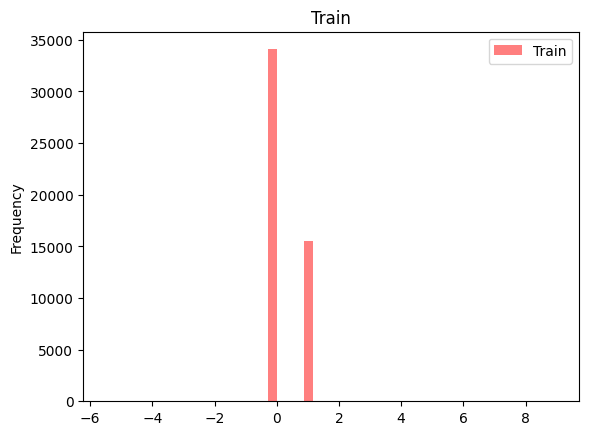

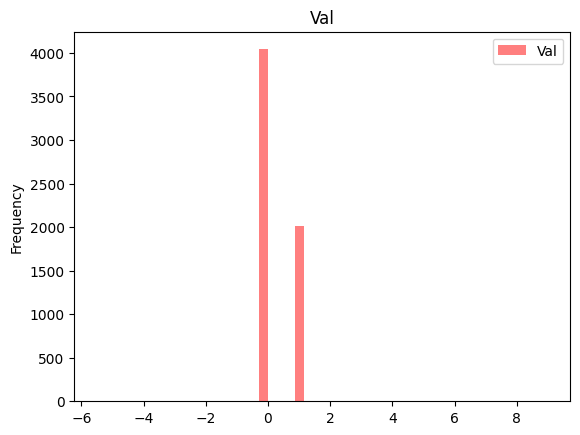

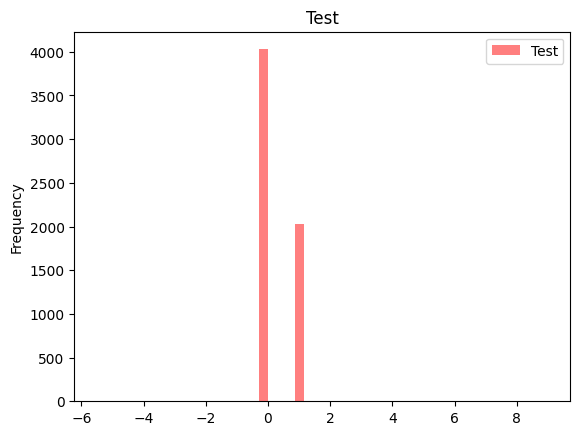

In [14]:
def hist_activities(set, Y):
  
  plt.hist(Y, alpha=0.5, bins=50, label=set, color='red', range=[-5.5, 9])
 

  plt.legend(loc='upper right')
  plt.ylabel('Frequency')
  plt.title(set)

  plt.show()

hist_activities("Train", Y_train)
hist_activities("Val", Y_valid)
hist_activities("Test", Y_test)